In [27]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import networkx as nx

In [80]:
df_contracts = pd.read_excel('data/contracts.xlsx', parse_dates=['Date'])


/tmp/ipykernel_47162/26949517.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_contracts = pd.read_excel('data/contracts.xlsx', parse_dates=['Date'])


In [2]:
df_relationships = pd.read_excel('data/person_relationships.xlsx')
df_contracts = pd.read_excel('data/contracts.xlsx')
df_person_mentions = pd.read_excel('data/person_mentions.xlsx')

In [47]:
df_relationships

,Person 1 ID,Person 1 Name,Relationship Type,Person 2 ID,Person 2 Name
0,df4efd40-3fdb-4fd8-8ca0-1c53520e75f6,Abbondi Di Rossi,grz:isSonOf,38f1b3fe-857c-4dad-97cd-aa80eb5e70bb,Francesco Di Rossi (da Milano)
1,d9838b83-e2c7-42c8-b036-6799d5ca734a,Abbondio D'Apiano,grz:isFatherOf,906b7b06-0ed8-4c9e-b525-88f48d5ca056,Francesco D'Apiano
2,1f2e35f8-e3c0-47c3-8778-fe9f92bea25a,Abbondio Del Bondio,grz:isSonOf,4a7e7333-8bf7-4514-993f-0ea3f953fa91,Abbondio Del Bondio 177266
3,8bf2a7c7-4797-439e-8ed5-6717a4eaf51d,Abbondio Gracio,grz:isFatherOf,8d55328a-e415-4d42-a9ca-e048a3c12970,Bernardo Gracio
4,7844c44f-2687-492f-9953-439070506903,Abbondio Pain,grz:isSonOf,c64f5c72-75ca-456c-b8eb-39b3c943fcdc,Antonio Pain 173404
...,...,...,...,...,...
79619,e0227c5a-086f-4752-a0f4-c846f0760f63,Zulian Raimondi,grz:isSonOf,618dbe06-e977-48fb-af07-13f72424ca68,Antonio Raimondi
79620,97d8b2df-bee3-45e4-a713-c1442f21d9c4,Zulian Zoretti,grz:isSonOf,51f7ae21-d016-4b9a-b89e-bc645b768f2c,Domenego Zoretti
79621,5a7c86fb-6967-441d-bd07-0e299f9ab652,Zulin di Per Zulin,grz:isUncleOf,7d2f2a41-a6fd-4648-9c52-a272ec9c7c86,Piero Manfredo
79622,ba674d78-8614-4dee-8486-eadaa7435acf,Zuna Battista de Piaza,grz:isSonOf,4c35094b-d9a0-4bda-ad26-6fd056dddc54,Liberal de Piaza


In [ ]:
all_person_ids = df_relationships['Person 1 ID'].tolist() + df_relationships['Person 2 ID'].tolist() + df_relationships['Person 1 Name'].tolist() 
print(len(all_person_ids)- len(set(all_person_ids)))
print(len(all_person_ids))





20846
238872


In [15]:
is_father_network = df_relationships[df_relationships['Relationship Type'] == 'grz:isFatherOf']
is_father_network

,Person 1 ID,Person 1 Name,Relationship Type,Person 2 ID,Person 2 Name
1,d9838b83-e2c7-42c8-b036-6799d5ca734a,Abbondio D'Apiano,grz:isFatherOf,906b7b06-0ed8-4c9e-b525-88f48d5ca056,Francesco D'Apiano
3,8bf2a7c7-4797-439e-8ed5-6717a4eaf51d,Abbondio Gracio,grz:isFatherOf,8d55328a-e415-4d42-a9ca-e048a3c12970,Bernardo Gracio
13,ba63b706-3020-46d4-9bd7-8b813029b9b4,Abramo 162446,grz:isFatherOf,99b83179-b185-421a-a1fd-75a16cbc8528,Cristoforo 162446
21,32a926ed-ec94-4575-abbf-c56ec67a3ebb,Achille 153-II306,grz:isFatherOf,2773b53e-7472-4d8d-8436-f05b747e6b9f,Pomponio di Achille (marangon)
24,e01d299f-b702-46b9-bf67-74b6ba2ea873,Adamo 1,grz:isFatherOf,45026ded-8e12-4f36-9d81-984f6acdae49,Andrea di Adamo (tellariol)
...,...,...,...,...,...
79603,cd637d1a-18a7-41b1-8c33-fdb41ad21ee3,Zubiet?,grz:isFatherOf,76e0be63-31ef-4382-9565-ec06a8edfd06,Silvestro di Zubiet?
79604,f8fd0f70-5432-43fa-af39-82464360cf17,Zubit?,grz:isFatherOf,76e0be63-31ef-4382-9565-ec06a8edfd06,Silvestro di Zubiet?
79607,a0a5afcb-39ce-420d-8257-3a7f4b44e512,Zulian delli Rusi,grz:isFatherOf,b0553264-22f7-4089-a986-a951b86a9271,Gasparo delli Rusi
79611,24f4759f-7fe4-4c92-afbc-52e2bbac919f,Zulian Furlan,grz:isFatherOf,713fd39d-dc0e-4c93-8086-d58b66f939ff,Lorenzo Furlan (tiraoro)


In [25]:
df_masters_apprantices = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Master', 'grz:Apprentice'])][colum_select]
df_masters_apprantices

,Person ID,Person Name,Contract ID,Tag
0,f1e0fa88-1ff5-4cc7-8fba-854d148f0306,Paolo Di Bori,f47a0743-e315-4606-bfab-8f603d5000f9,grz:Apprentice
2,bc3ecc02-652f-42d9-8bba-fc4561152b5a,Nicolò Barazzuso,d74fb5f0-ab73-4e2e-9762-3227294d6899,grz:Master
4,49f8b298-b445-4715-8feb-97b23ce2770d,Giacomo Durin,197bdfc9-c26a-417f-b0ba-657b81a16cac,grz:Apprentice
5,065fb6cf-0990-4acb-bf19-bf6b97471767,Battista Crovato 179149,63bb2629-2e05-4df6-a619-fcb42df842a0,grz:Apprentice
6,bc2fa44a-b7db-4aa7-b39f-c02ba5b43220,Gaspare Homo,d78a05f4-2a87-4cea-928d-460418f5e65b,grz:Apprentice
...,...,...,...,...
156140,ac44d888-933b-412d-9d1e-22c8b87110cb,Agostino de Francesco,1fe25c35-f56d-4f13-afe2-1cf3f05226fc,grz:Master
156141,f6a5ae1a-c5ba-4d3d-b7d3-b3a59f61d48a,Giovanni Antonio Marchese,263a1e09-f4c0-4214-8b09-d252256f26bb,grz:Apprentice
156142,2d16203d-1180-4513-96d7-f76b2f4cec3b,Giovanni Battista Panciera (sartor),870c156d-dea4-4b64-b44e-9c54867a5c4d,grz:Apprentice
156145,23b1a1f8-1602-470b-b98d-1ccf67e8ce88,Giuseppe Marzini,a88b5738-27ea-41a9-87cb-0c9026eb040b,grz:Apprentice


In [30]:
colum_select = ['Person ID', 'Person Name', 'Contract ID', 'Tag']
df_masters = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Master'])][colum_select]
df_apprantices = df_person_mentions[df_person_mentions['Tag'].isin(['grz:Apprentice'])][colum_select]

df_master_apprentice = pd.merge(
    df_masters,
    df_apprantices,
    on='Contract ID',
    suffixes=('_master', '_apprentice')
)
df_master_apprentice

G_apprentiships = nx.from_pandas_edgelist(df_master_apprentice, source='Person ID_master', target='Person ID_apprentice', edge_attr='Contract ID', create_using=nx.Graph())

In [38]:
num_components = nx.number_connected_components(G_apprentiships)

degrees = [d for _, d in G_apprentiships.degree()]

print(f"Number of nodes: {G_apprentiships.number_of_nodes()}")
print(f"Number of edges: {G_apprentiships.number_of_edges()}")
print(f"Connected components: {num_components}")

print(f"Average degree: {sum(degrees)/len(degrees):.2f}")
print(f"Max degree: {max(degrees)}")
print(f"Min degree: {min(degrees)}")

Number of nodes: 94031
Number of edges: 54630
Connected components: 39495
Average degree: 1.16
Max degree: 39
Min degree: 1


In [87]:
degrees_no_ones = [d for d in degrees if d != 1]
len(degrees_no_ones)

9596

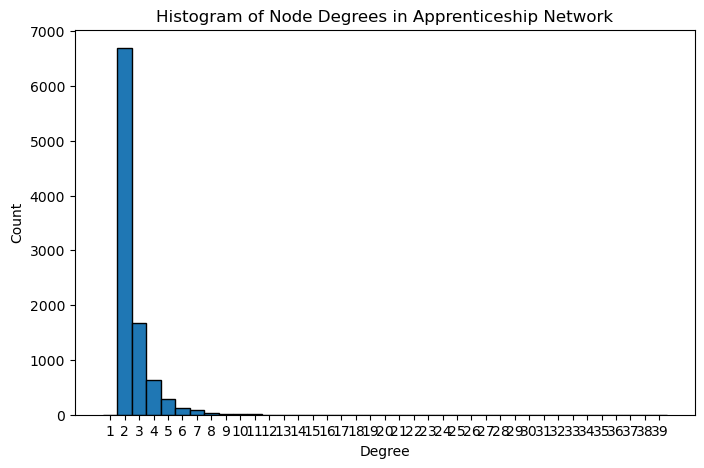

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(degrees_no_ones, bins=range(1, max(degrees_no_ones)+2), edgecolor='black', align='left')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Histogram of Node Degrees in Apprenticeship Network')
plt.xticks(range(1, max(degrees_no_ones)+1))
plt.show()

In [119]:
df_contracts_1722_1772 = df_contracts[
    (df_contracts['Date'] >= '1722-01-01') & (df_contracts['Date'] <= '1772-12-31')
]
print(len(df_contracts_1722_1772))
print(len(df_contracts))
df_contracts


4757
54216


,Contract ID,Register,Page,Date
0,01213dcc-5cff-415e-8d6e-91150828ce30,170,f21v,0000-00-00
1,0fa08eb4-21f2-4838-a22d-32dd29378fd0,172,f300r,0000-00-00
2,10131a7c-49fa-4b62-a163-f03bfe73f8f0,170,f21v,0000-00-00
3,16a71f89-1278-43de-abb7-9d378bcc4d44,170,f111v,0000-00-00
4,17dd187e-c8b2-4bc5-94eb-cdc68a97f8c7,173,f7r,0000-00-00
...,...,...,...,...
54211,ccda404b-95ff-46fb-b491-177e2a1de4c8,182,f40r,1772-05-09
54212,40f49aa3-bff4-4221-a22a-801df6f7c899,182,f40r,1772-05-13
54213,da38eb53-b74b-42e6-ae03-5f978fcb12d3,182,f40v,1772-05-19
54214,b89c26a8-24fc-4bb3-9b23-607faa10b082,182,f40v,1772-05-29


In [96]:
def get_graph_analysis(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    num_components = nx.number_connected_components(G)
    degrees = [d for _, d in G.degree()]
    avg_degree = sum(degrees) / len(degrees) if degrees else 0
    max_degree = max(degrees) if degrees else 0
    min_degree = min(degrees) if degrees else 0

    degrees = [d for _, d in G.degree()]

    
    return {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'num_components': num_components,
        'avg_degree': avg_degree,
        'max_degree': max_degree,
        'min_degree': min_degree
    }, degrees

In [ ]:
colum_select = ['Person ID', 'Person Name', 'Contract ID', 'Tag']
df_person_mentions_clean = df_person_mentions.dropna(subset=colum_select)

df_joined = pd.merge(
    df_person_mentions_clean[colum_select],
    df_person_mentions_clean[colum_select],
    on='Contract ID',
    suffixes=('_1', '_2')
)

# Drop rows where all columns except 'Contract ID' are exactly the same
df_joined = df_joined[~(df_joined['Person ID_1'] == df_joined['Person ID_2'])]

G_apprentiships = nx.from_pandas_edgelist(df_joined, source='Person ID_1', target='Person ID_2')

kpis_graph, node_degree_list = get_graph_analysis(G_apprentiships)
print(kpis_graph)




{'num_nodes': 137710, 'num_edges': 156710, 'num_components': 36700, 'avg_degree': 2.2759421973712874, 'max_degree': 74, 'min_degree': 1}


In [109]:
df_joined['Contract ID'].value_counts()

nodes_with_one_edge = [n for n, d in G_apprentiships.degree() if d == 1]

df_person_mentions[df_person_mentions['Person ID'].isin(nodes_with_one_edge)][colum_select]



,Person ID,Person Name,Contract ID,Tag
4,49f8b298-b445-4715-8feb-97b23ce2770d,Giacomo Durin,197bdfc9-c26a-417f-b0ba-657b81a16cac,grz:Apprentice
13,758d8745-4e40-4744-97d6-67db0dd39bb4,Pietro Gottoni 171090,45e0225d-77b3-447b-8639-d6af07dcc8eb,grz:Apprentice
15,9d1c47cd-258e-44fb-afab-2c2cdd9fdcef,Bertollo Varisco,65bd27ef-d6a8-4437-87b2-e4e5cb300556,grz:Apprentice
19,aea86eec-2881-41db-9983-d53d09596dd5,Alberto di Lazzaro,03e59163-5311-4fa0-992a-994e4c9cee70,grz:Apprentice
26,cd9aa00a-682f-489e-a250-3f79414e3753,Carlo Lucatello 177144,ed24f729-d522-4efa-9011-abed13434da4,grz:Apprentice
...,...,...,...,...
156116,1f4df386-cf27-482b-bbd5-46289a4260e2,Ventura Carli,c4db6f5e-2695-4141-9cf0-7e57d2c939f8,grz:Apprentice
156124,494b6b0d-54ff-4230-95d8-a5e76b086f05,Antonio Martinoni 179234,0d4d1d04-210f-42bc-9ea3-fe7520e3c228,grz:Apprentice
156126,9f0a80ac-9a03-4da4-9942-8d926f218348,Ambrogio Di Manzoni,f7e88398-41f1-486e-acb1-0bed50fc544f,grz:Master
156131,a2104d4d-3d12-4cb2-b5a6-179169a31eb9,Gioacchino Chialasti,e3190903-6c0d-4b17-8117-3c387a08ee37,grz:Apprentice


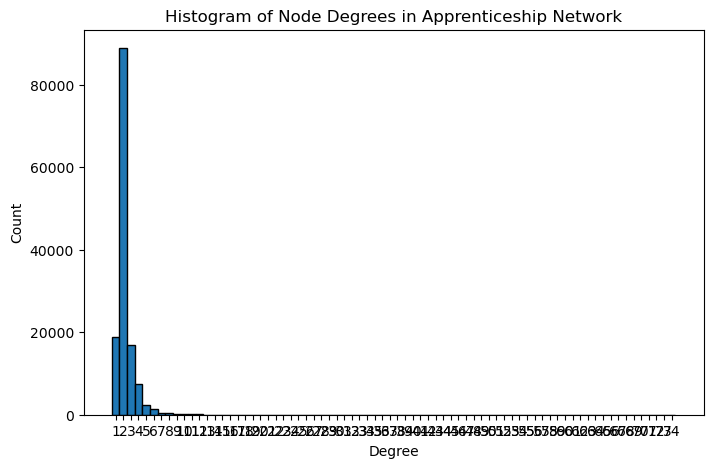

In [105]:
plt.figure(figsize=(8, 5))
plt.hist(node_degree_list, bins=range(1, max(node_degree_list)+2), edgecolor='black', align='left')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Histogram of Node Degrees in Apprenticeship Network')
plt.xticks(range(1, max(node_degree_list)+1))
plt.show()

# Entity connection 

In [ ]:
colum_select = ['ID', 'Full Name', 'Person Name',  
                'Professions - Transcripts',  'Professions - Standard Forms',
                'Geo Origin - Transcript', 'Geo Origin - Standard Form', 'Age',
                 'Tag', 'Person ID']

df_person_mentions_clean = df_person_mentions.dropna(subset=colum_select)

print(df_person_mentions.shape, df_person_mentions_clean.shape)


df_person_mentions_clean = pd.merge(
    df_person_mentions_clean,
    df_contracts[df_contracts['Date'] >= '1500-01-01' ],
    on='Contract ID',
    how='inner'

)


df_person_mentions_clean[['Person ID', 'Person Name', 'Geo Origin - Standard Form', 'Professions - Standard Forms', 'Date']].head()



(156148, 20) (40942, 20)


,ID,Full Name,Gender,Age,Geo Origin - Transcript,Geo Origin - Standard Form,Geo Origin - Parish,Residence - Transcript,Residence - Standard Form,Residence - Parish,...,Professions - Transcripts,Professions - Standard Forms,Details,Person ID,Person Name,Contract ID,Tag,Register,Page,Date
0,0001697b-4fc1-45b4-8da4-5a09ef070bb9,"Batista Crovatto, di Alatio",grz:Male,ettà maggiore,Venetia,Venezia,NaN,NaN,NaN,NaN,...,marangon da fabriche,marangon da fabriche,NaN,065fb6cf-0990-4acb-bf19-bf6b97471767,Battista Crovato 179149,63bb2629-2e05-4df6-a619-fcb42df842a0,grz:Apprentice,179,f75r,1715-08-17
1,0001cdcb-9211-4a1e-a2fd-98eb96f17520,"Gasparo Homo, di Zuane",grz:Male,10,da Lio,Lio Piccolo,NaN,NaN,NaN,NaN,...,frutariol,frutariol,NaN,bc2fa44a-b7db-4aa7-b39f-c02ba5b43220,Gaspare Homo,d78a05f4-2a87-4cea-928d-460418f5e65b,grz:Apprentice,166,f65r,1642-11-15
2,0002cbe1-9669-4774-9f14-1410210cc449,"Zacharia Casolato, quondam Tadio",grz:Male,20,Voltolina de Bormio,Bormio,NaN,NaN,NaN,NaN,...,"barbier, stuer","barbier, stuer",NaN,5aa193e5-3b10-4040-b9d8-52a1a1819591,Zaccaria Casolato,474955e3-e850-4d1c-b524-1f6ac42193e2,grz:Apprentice,158,f133v,1598-06-30
3,0003e737-ed7b-4fd8-8a86-8192e89c581b,"Zamaria Ferrari, quondam Zuanne",grz:Male,14,bressan,Brescia (area),NaN,NaN,NaN,NaN,...,fenestrer,fenestrer,NaN,b45dffde-0023-48ed-bf62-73f3e2038318,Giovanni Maria Ferrari,a6938350-4473-4f8b-b7ab-27f0a07e3783,grz:Apprentice,173,f164v,1664-12-16
4,000414bd-1e5a-47e9-a140-d782114cfc2f,"Pontel, di Zuane",grz:Male,10,cargnia,Carnia (area),NaN,NaN,NaN,NaN,...,tesser,tesser,NaN,1fca4572-04bb-48f1-b7d9-ff54a33bb0bc,Pontel di Zuane,135a2571-8bc8-461f-a4c6-0cb4276a74d9,grz:Apprentice,155,f155v,1592-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40924,fff700f6-6608-4384-9a74-344f0601b796,"Gioacchina Chialasti, quondam Andrea",grz:Male,14,romano,Romano (ambiguous),NaN,NaN,NaN,NaN,...,tornidor,tornidor,NaN,a2104d4d-3d12-4cb2-b5a6-179169a31eb9,Gioacchino Chialasti,e3190903-6c0d-4b17-8117-3c387a08ee37,grz:Apprentice,181,f59v,1739-03-21
40925,fff70930-c30c-429a-af7f-45de8d93a17f,"Francesco Pignatta, di Gasparo",grz:Male,13,Venetia,Venezia,NaN,NaN,NaN,NaN,...,zoccoler,zocoler,NaN,0534cd65-63c1-492e-9a72-b5d9d92c63a5,Francesco Pignattta,5ec9a775-2c0c-4f11-91fb-b051c78e79f8,grz:Apprentice,171,f155r,1659-07-29
40926,fffc6ee6-8ff6-467b-9e42-1bfc713ed682,"Giovanni Antonio Marchese, di Pietro Antonio",grz:Male,13,bergamasco,Bergamo (area),NaN,NaN,NaN,NaN,...,spitier da confeture,specier da confeti,NaN,f6a5ae1a-c5ba-4d3d-b7d3-b3a59f61d48a,Giovanni Antonio Marchese,263a1e09-f4c0-4214-8b09-d252256f26bb,grz:Apprentice,177,f144v,1709-06-20
40927,fffc7f3d-10e9-4589-905f-51ddf536c611,"Zuane Battista Panciera, di Giacomo",grz:Male,12,Venezia,Venezia,NaN,NaN,NaN,NaN,...,sartor,sartor,NaN,2d16203d-1180-4513-96d7-f76b2f4cec3b,Giovanni Battista Panciera (sartor),870c156d-dea4-4b64-b44e-9c54867a5c4d,grz:Apprentice,180,f228v,1733-02-09


In [ ]:
colum_select = ['Person ID', 'Person Name', 'Contract ID', 'Tag']
df_person_mentions_clean = df_person_mentions.dropna(subset=colum_select)


df_contracts


df_master_apprentice = pd.merge(
    df_masters,
    df_apprantices,
    on='Contract ID',
    suffixes=('_master', '_apprentice')
)